## Import and Funs

In [22]:
#%% Data reader
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras.utils import to_categorical
import os
import sklearn as sk
import sklearn.metrics.pairwise
from skimage.transform import resize
from sklearn import preprocessing
def readdata (datapath):#read data from csv and store in array with type of float
    data_in = list()
    with open(datapath) as csvfile:
       spamreader = csv.reader(csvfile)
       for i, row in enumerate(spamreader):
           if i == 0:
               categories = row
           else:
               data_in.append(row)
    
    data_in = np.array(data_in)
    data_in_trigger = [row[-8:] for row in data_in] # only trigger 
    data_in_notrigger = [row[:-8] for row in data_in] # without trigger 
    data_in_notrigger_float = list()
    data_in_trigger_float = list()
    for i in range(0,len(data_in_notrigger)):
        buff = np.float32(data_in_notrigger[i])
        data_in_notrigger_float.append(buff)
    ## transfer trigger data into float
    #for i in range(0,len(data_in_trigger)):
    #    buff = np.float32(data_in_trigger[i])
    #    data_in_trigger_float.append(buff)
    array_data_in_notrigger_float = np.array(data_in_notrigger_float)
    rowcount = array_data_in_notrigger_float.shape[0]
    colcount = array_data_in_notrigger_float.shape[1]
    dict_data_in = dict()
    for col in range(colcount):
        dict_data_in[categories[col]] = array_data_in_notrigger_float[:,col]
    label = dict_data_in['Mode']
    label_prep = to_categorical(label)
    return array_data_in_notrigger_float, dict_data_in, rowcount, colcount, categories, label_prep
#%% SubPlot
def PlotIMUs(IMU_Loc,Array_data, Label_prep, Channel_catagories, fig_size = (25,15),Ifsave=False,PrepType='raw'):
    labelcategories = ['Sitting','Level Ground Walking','Ramp Ascent','Ramp Descent','Stair Ascent','Stair Descent','Standing']
    array_data1 = Array_data
    label_prep1 = Label_prep
    cm = plt.get_cmap('gist_rainbow')
    FirstIndex = Channel_catagories.index(IMU_Loc+'_Ax')
    fig2 = plt.figure(figsize=fig_size,constrained_layout=True)
    spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[0, 0],title='IMU_Ax_'+PrepType)
    plt.plot(t_seq, array_data1[:,0+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,0+FirstIndex].max(), label=labelcategories[i])
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,0+FirstIndex].min(), label_prep1[:,i]*array_data1[:,0+FirstIndex].max(), alpha=0.3) 
    f2_ax1.set_xlabel('Time(s)')
    f2_ax1.set_ylabel('Acceleration(m/s2)')
    f2_ax2 = fig2.add_subplot(spec2[0, 1],title='IMU_Ay_'+PrepType)
    plt.plot(t_seq, array_data1[:,1+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,1+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,1+FirstIndex].min(), label_prep1[:,i]*array_data1[:,1+FirstIndex].max(), alpha=0.3) 
    f2_ax2.set_xlabel('Time(s)')
    f2_ax2.set_ylabel('Acceleration(m/s2)')
    
    f2_ax3 = fig2.add_subplot(spec2[0, 2],title='IMU_Az_'+PrepType)
    plt.plot(t_seq, array_data1[:,2+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,2+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,2+FirstIndex].min(), label_prep1[:,i]*array_data1[:,2+FirstIndex].max(), alpha=0.3)
    f2_ax3.set_xlabel('Time(s)')
    f2_ax3.set_ylabel('Acceleration(m/s2)')
    
    f2_ax4 = fig2.add_subplot(spec2[1, 0],title='IMU_Gy_'+PrepType)
    plt.plot(t_seq, array_data1[:,3+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,3+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,3+FirstIndex].min(), label_prep1[:,i]*array_data1[:,3+FirstIndex].max(), alpha=0.3)
    f2_ax4.set_xlabel('Time(s)')
    f2_ax4.set_ylabel('Angular Velocity(degree/s)')
    
    
    f2_ax5 = fig2.add_subplot(spec2[1, 1],title='IMU_Gz_'+PrepType)
    plt.plot(t_seq, array_data1[:,4+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,4+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,4+FirstIndex].min(), label_prep1[:,i]*array_data1[:,4+FirstIndex].max(), alpha=0.3)
    f2_ax5.set_xlabel('Time(s)')
    f2_ax5.set_ylabel('Angular Velocity(degree/s)')
    
    f2_ax6 = fig2.add_subplot(spec2[1, 2],title='IMU_Gx_'+PrepType)
    plt.plot(t_seq, array_data1[:,5+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,5+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,5+FirstIndex].min(), label_prep1[:,i]*array_data1[:,5+FirstIndex].max(), alpha=0.3) 
    f2_ax6.set_xlabel('Time(s)')
    f2_ax6.set_ylabel('Angular Velocity(degree/s)')
    
    fig2.legend(loc=4)
    fig2.suptitle(IMU_Loc,fontsize=20, x=0.4)
    f2_ax1.title.set_fontsize(16)
    f2_ax2.title.set_fontsize(16)
    f2_ax3.title.set_fontsize(16)
    f2_ax4.title.set_fontsize(16)
    f2_ax5.title.set_fontsize(16)
    f2_ax6.title.set_fontsize(16)
    if Ifsave:
        fig2.savefig(os.path.join(savepath,IMU_Loc)+'.png')
    savepath = r'C:\Users\Zed_Luz\OneDrive\3-MEE\21-NUS Lab Intern\Work\3-IMU-DeepLearning\Zeyu\1-Python Files\DataGraph\1-IMUs'
    fig2.savefig(os.path.join(savepath,IMU_Loc)+'.png')
#%%
def PlotGONIOs(GONIO_Loc,Array_data, Label_prep, Channel_catagories, fig_size = (25,15),Ifsave=False,PrepType='raw'):
    labelcategories = ['Sitting','Level Ground Walking','Ramp Ascent','Ramp Descent','Stair Ascent','Stair Descent','Standing']
    array_data1 = Array_data
    label_prep1 = Label_prep
    cm = plt.get_cmap('gist_rainbow')
    FirstIndex = Channel_catagories.index(GONIO_Loc+'_Ankle')
    fig2 = plt.figure(figsize=fig_size,constrained_layout=True)
    spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
    
    f2_ax1 = fig2.add_subplot(spec2[0, 0],title=GONIO_Loc+'_Knee_Angle_'+PrepType)
    f2_ax1.title.set_fontsize(16)
    plt.plot(t_seq, array_data1[:,1+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,1+FirstIndex].max(), label=labelcategories[i])
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,1+FirstIndex].min(), label_prep1[:,i]*array_data1[:,1+FirstIndex].max(), alpha=0.3) 
    f2_ax1.set_xlabel('Time(s)')
    f2_ax1.set_ylabel('Acceleration(m/s2)')
    
    f2_ax2 = fig2.add_subplot(spec2[0, 1],title=GONIO_Loc+'_Ankle_Angle_'+PrepType)
    f2_ax2.title.set_fontsize(16)
    plt.plot(t_seq, array_data1[:,0+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,0+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,0+FirstIndex].min(), label_prep1[:,i]*array_data1[:,0+FirstIndex].max(), alpha=0.3) 
    f2_ax2.set_xlabel('Time(s)')
    f2_ax2.set_ylabel('Acceleration(m/s2)')
    
    f2_ax4 = fig2.add_subplot(spec2[1, 0],title=GONIO_Loc+'_Knee_Velocity_'+PrepType)
    f2_ax4.title.set_fontsize(16)
    plt.plot(t_seq, array_data1[:,5+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,5+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,5+FirstIndex].min(), label_prep1[:,i]*array_data1[:,5+FirstIndex].max(), alpha=0.3) 
    f2_ax4.set_xlabel('Time(s)')
    f2_ax4.set_ylabel('Angular Velocity(degree/s)')
    
    f2_ax5 = fig2.add_subplot(spec2[1, 1],title=GONIO_Loc+'_Ankle_Velocity_'+PrepType)
    f2_ax5.title.set_fontsize(16)
    plt.plot(t_seq, array_data1[:,4+FirstIndex],'k')
    for i in range(7):
        plt.plot(t_seq, label_prep1[:,i]*array_data1[:,4+FirstIndex].max())
        plt.set_cmap(cm)
        plt.fill_between(t_seq, label_prep1[:,i]*array_data1[:,4+FirstIndex].min(), label_prep1[:,i]*array_data1[:,4+FirstIndex].max(), alpha=0.3) 
    f2_ax5.set_xlabel('Time(s)')
    f2_ax5.set_ylabel('Angular Velocity(degree/s)')
    
    fig2.legend(loc=4,ncol=2,title='Modes',fontsize=15)
    fig2.suptitle(GONIO_Loc+' Leg',fontsize=20)
    savepath = r'C:\Users\Zed_Luz\OneDrive\3-MEE\21-NUS Lab Intern\Work\3-IMU-DeepLearning\Zeyu\1-Python Files\DataGraph\2-GONIO'
    if Ifsave:
        fig2.savefig(os.path.join(savepath,IMU_Loc)+'.png')

#%%
    #modified from https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

## Main

In [2]:
#%% Main
DatasetPath = r'C:\Users\Zed_Luz\OneDrive - 南方科技大学\BigScaleFiles\1-datasets for bilateral lower limb neuromechanical signals\2-Data'
#OnlineDatapath = r'C:\Users\Zed_Luz\OneDrive - 南方科技大学\BigScaleFiles\1-datasets for bilateral lower limb neuromechanical signals\2-Data\AB185\Processed\AB185_Circuit_001_post.csv'
OnlineDatapath = dict()
Subjects = []# ['AB185', 'AB186',...]
for (dirpath, dirnames, filenames) in os.walk(DatasetPath):
    Subjects.extend(dirnames)
    break
DataType = [] # ['Features', 'MVC', 'Processed', 'Raw']
for (dirpath, dirnames, filenames) in os.walk(os.path.join(DatasetPath,Subjects[0])):
    DataType.extend(dirnames)
    break
DataFileName = [] # ['Features', 'MVC', 'Processed', 'Raw']
for (dirpath, dirnames, filenames) in os.walk(os.path.join(DatasetPath,Subjects[0],DataType[2])):
    DataFileName.extend(filenames)
    break
data = os.path.join(DatasetPath,Subjects[0],DataType[2], DataFileName[0])
array_data1, dict_data1, rowcount1, colcount1, categories1, label_prep1 = readdata(data)
exp_dur = rowcount1/500
t_seq = np.linspace(0, exp_dur, rowcount1)
labelcategories = ['Sitting','Level Ground Walking','Ramp Ascent','Ramp Descent','Stair Ascent','Stair Descent','Standing']


## Preprocess methods-Minmax([0,1]), scall(Mean=0, std=1), Max_Abs([-1,1])...

C:\Users\Zed_Luz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Zed_Luz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Text(0.5,1,'Max_Abs')

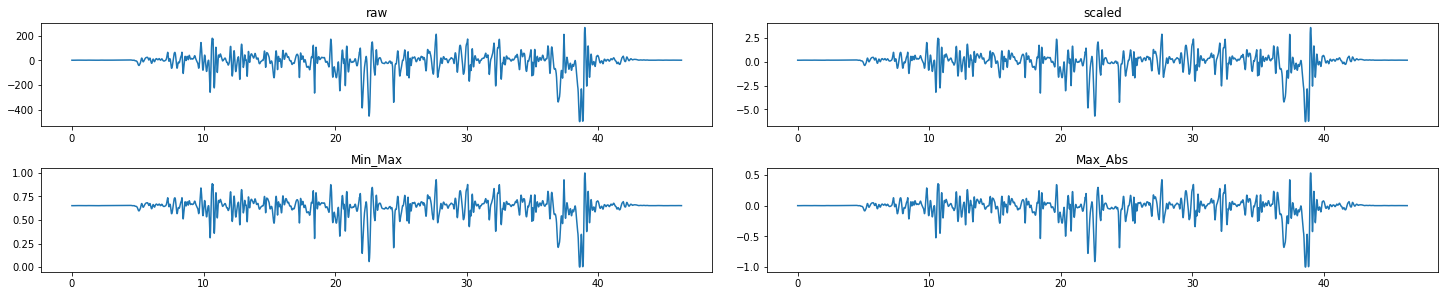

In [29]:
array_data1_scaled = preprocessing.scale(array_data1)

Min_max_scaller = preprocessing.MinMaxScaler()
array_data1_X_MinMax = Min_max_scaller.fit_transform(array_data1)

max_abs_scaler = preprocessing.MaxAbsScaler()
array_data1_X_maxabs = max_abs_scaler.fit_transform(array_data1)

Fig1,axes = plt.subplots(2,2, constrained_layout=True)
Fig1.set_figwidth(20)
axes[0,0].plot(t_seq, array_data1[:,5])
axes[0,0].set_title('raw')
axes[0,1].plot(t_seq, array_data1_scaled[:,5])
axes[0,1].set_title('scaled')
axes[1,0].plot(t_seq, array_data1_X_MinMax[:,5])
axes[1,0].set_title('Min_Max')
axes[1,1].plot(t_seq, array_data1_X_maxabs[:,5])
axes[1,1].set_title('Max_Abs')

### From comparasion above figs, Max_abs can contraint data range into [-1,1] and keep its negative features(others either lose it or exceed |1| ). Max_Abs scales each features by its maximum absolute value.So, preprocess method of Max_Abs could be reasonable for keep nagetive features and scale in 1 of absolute value.
### As shown below, all channels of data hava unstable absolute values and both positive and negative value, in order to normalize data for post-process and reserve its features of trend, sign and so on, Max_abs scaller is the most fitting method so far.

# Data illustration

## Left lege Goniometer raw data & data after MaxAbs

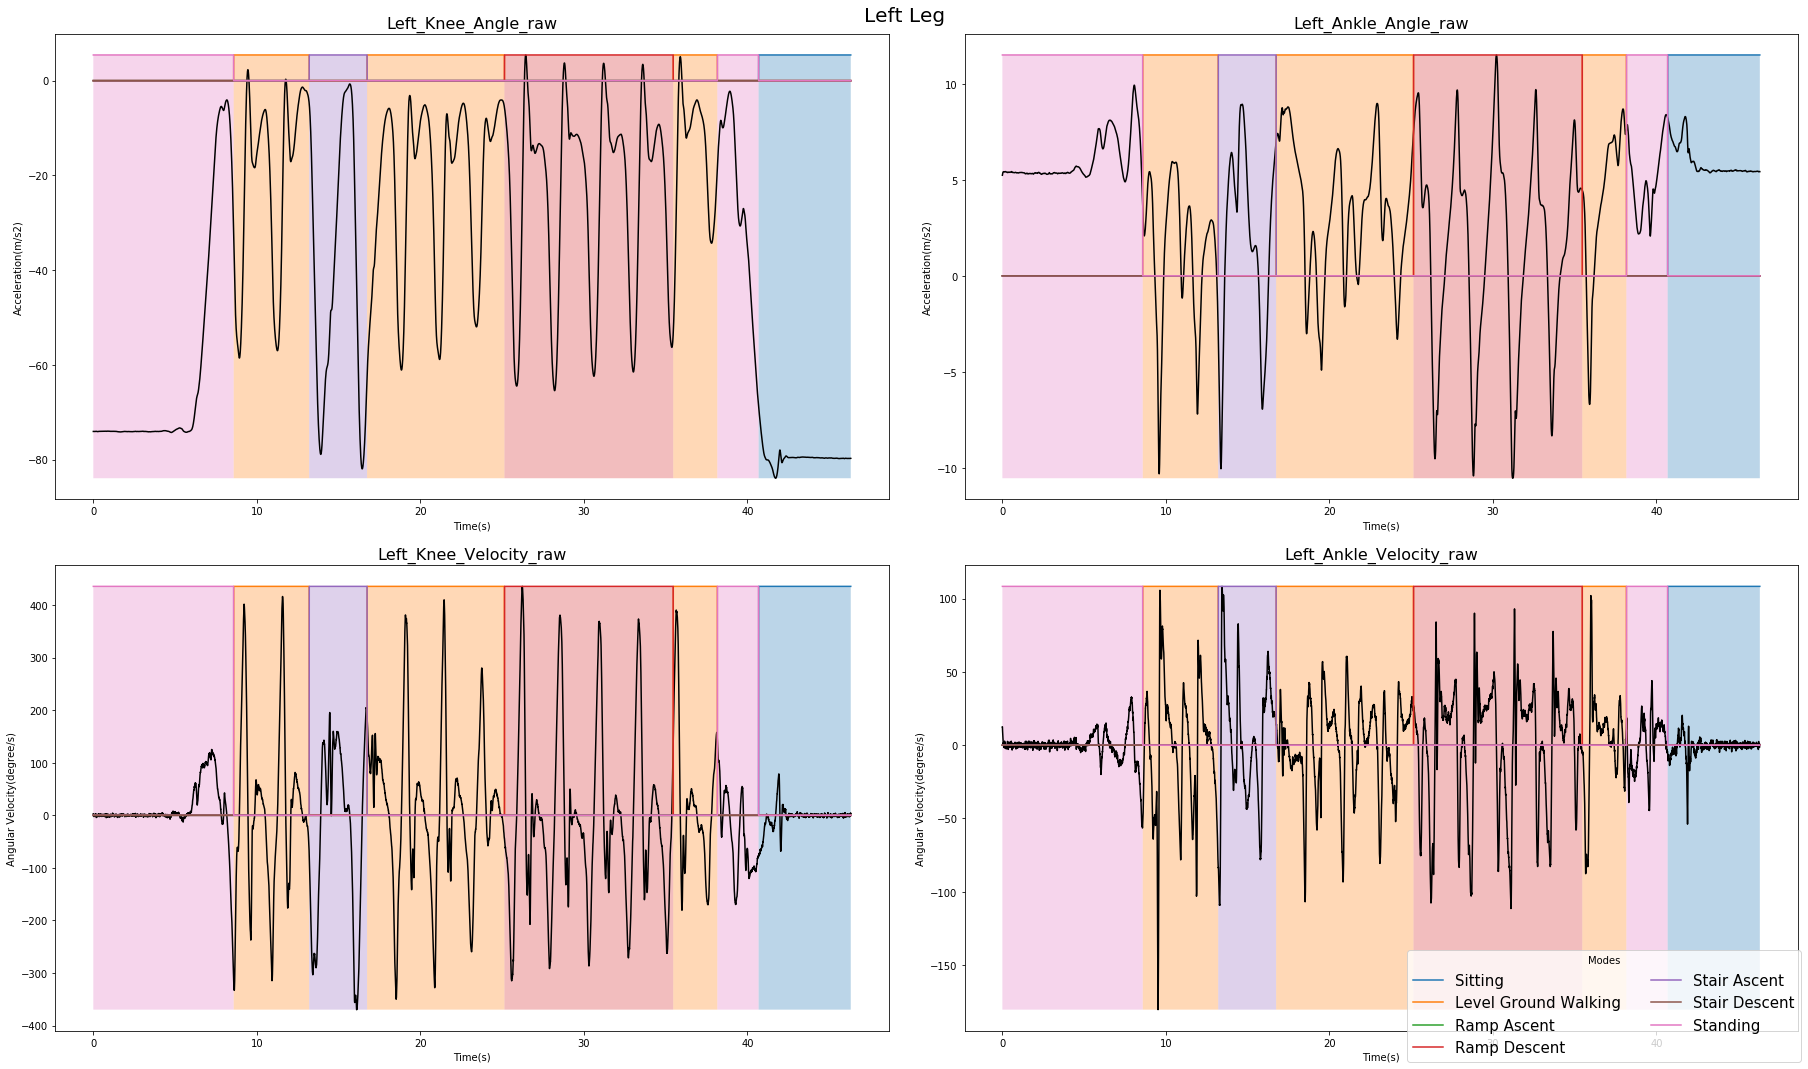

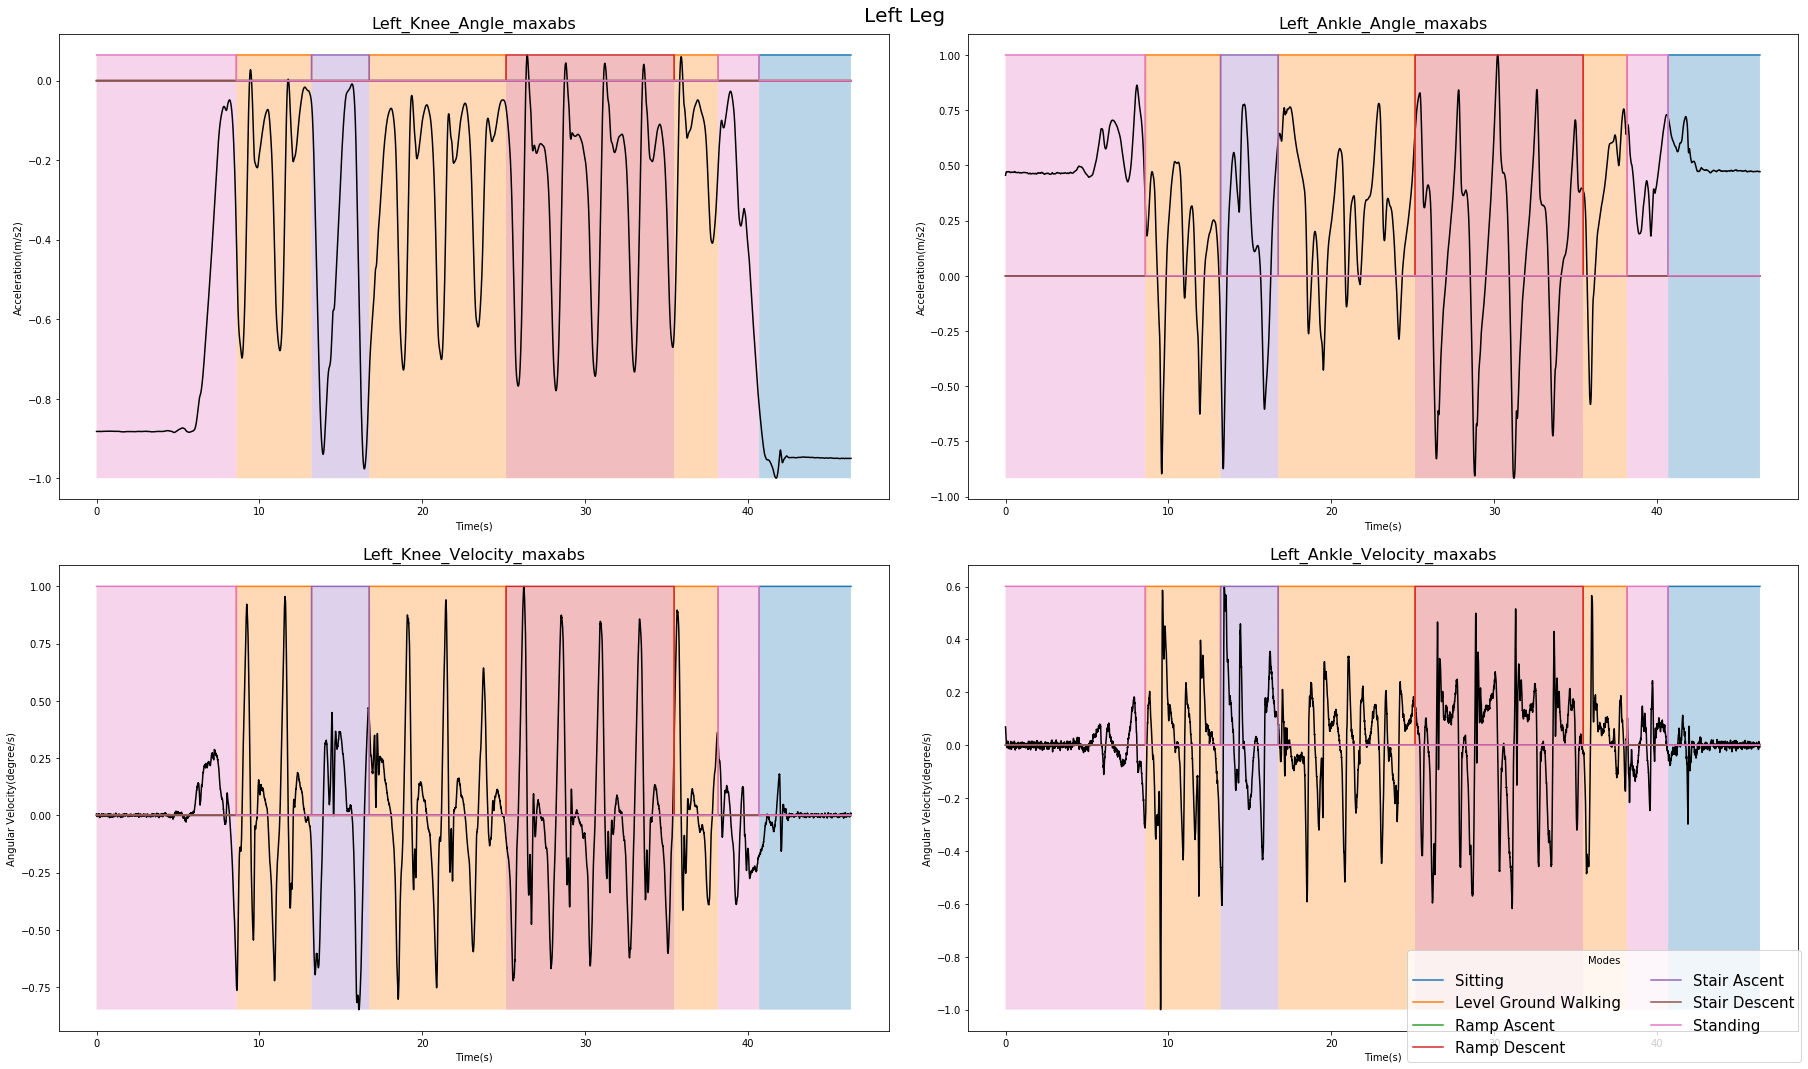

In [26]:
PlotGONIOs('Left',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)
PlotGONIOs('Left',Array_data=array_data1_X_maxabs,Channel_catagories=categories1,Label_prep=label_prep1,PrepType='maxabs')

## Right leg Goniometer raw data & data after MaxAbs

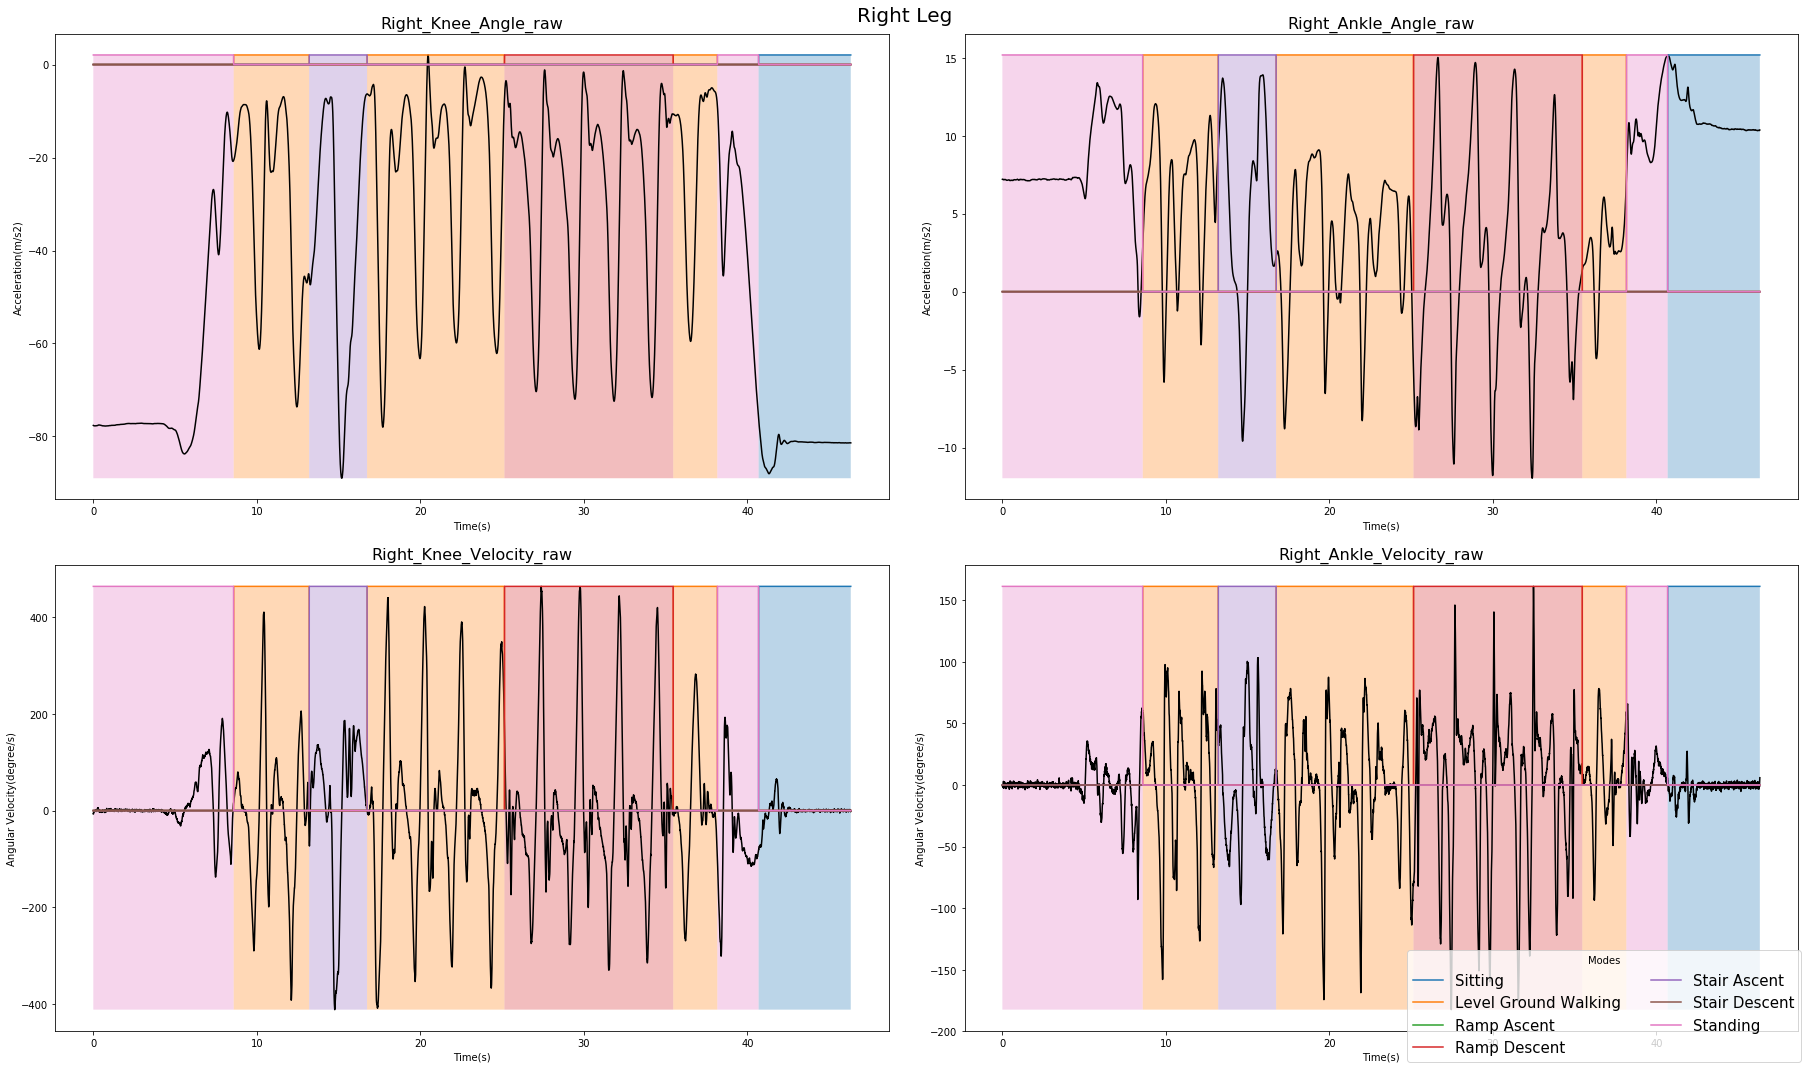

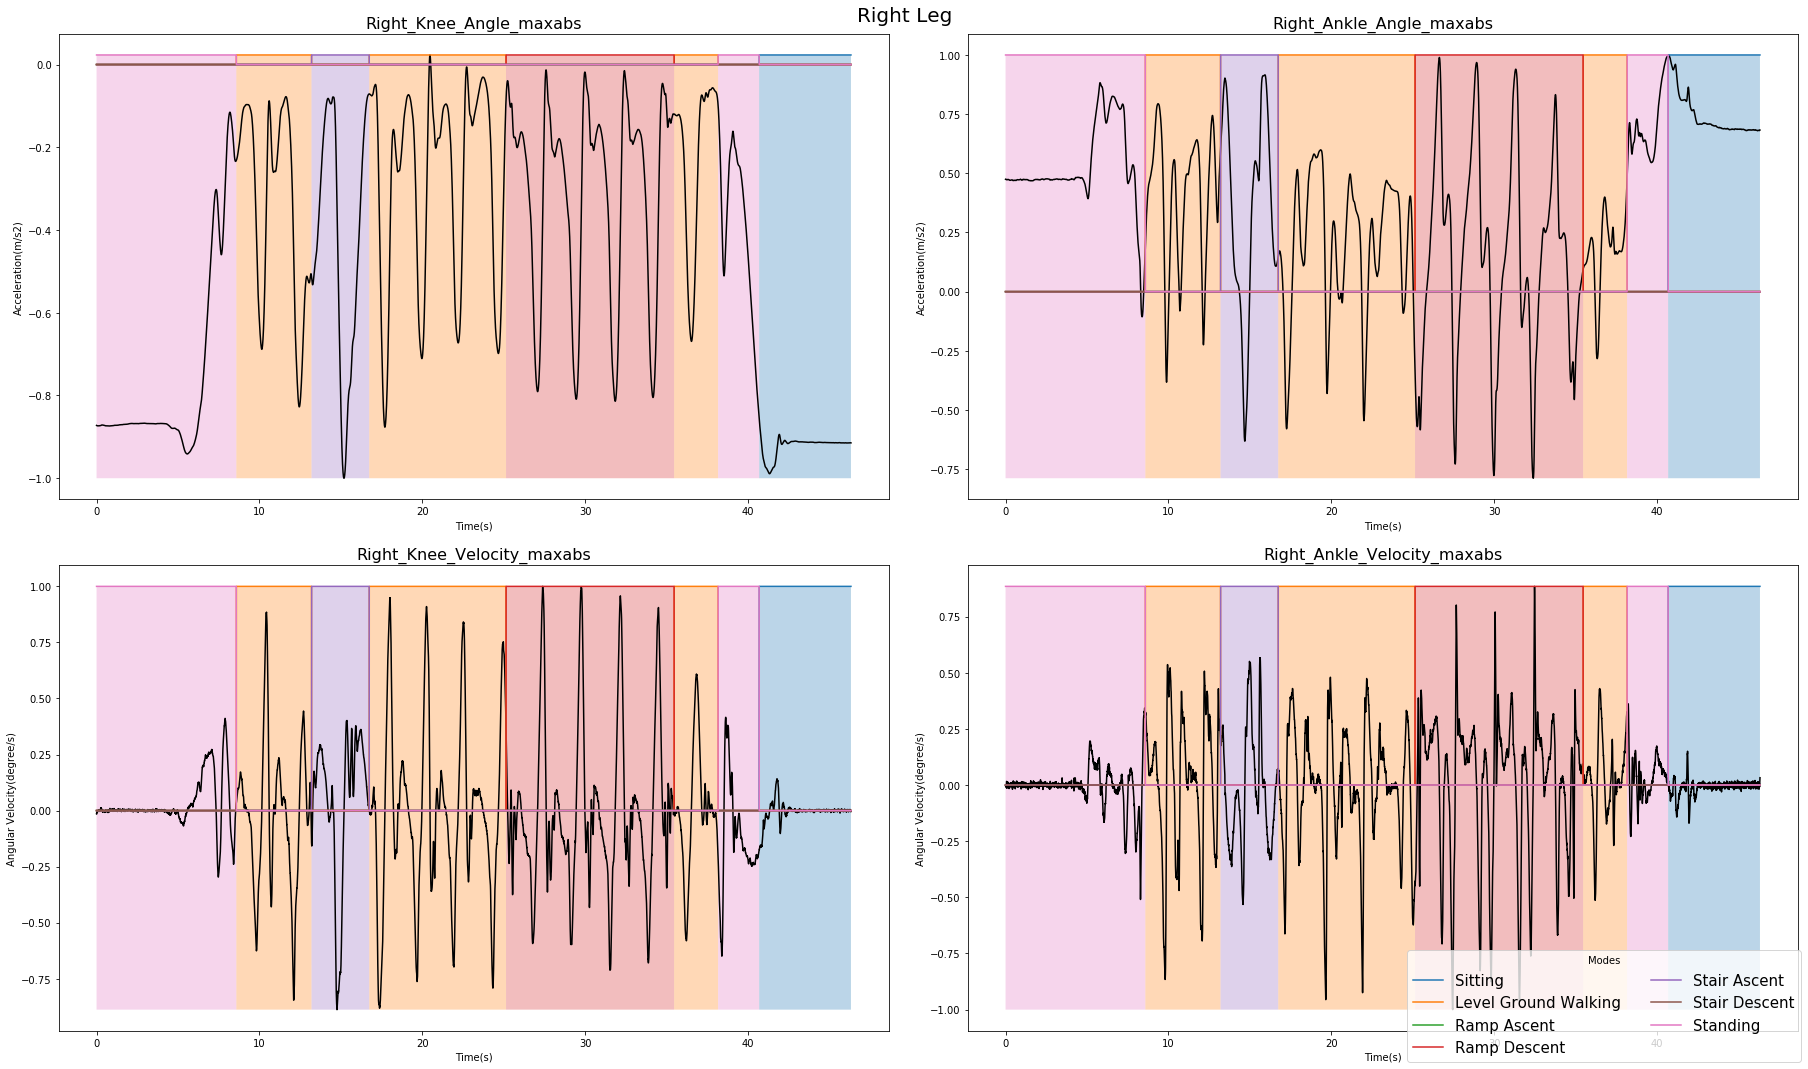

In [27]:
PlotGONIOs('Right',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)
PlotGONIOs('Right',Array_data=array_data1_X_maxabs,Channel_catagories=categories1,Label_prep=label_prep1,PrepType='maxabs')

## IMU data display

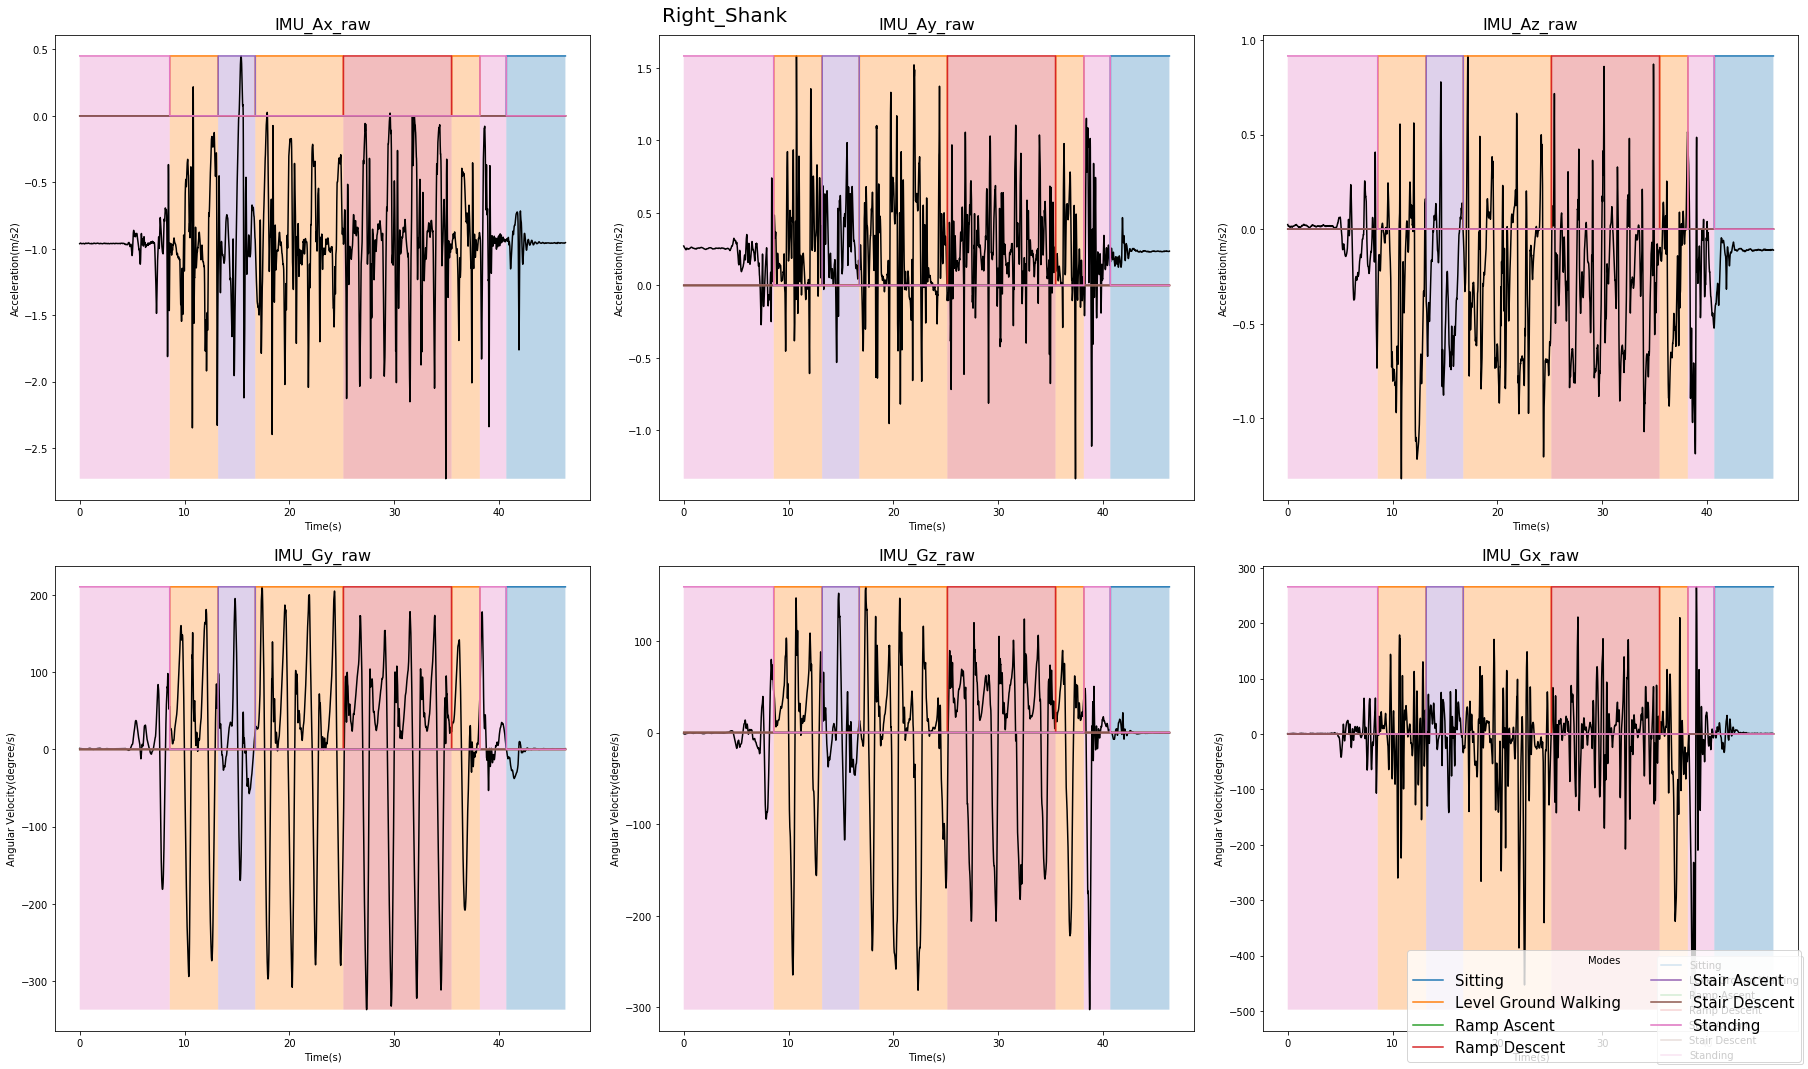

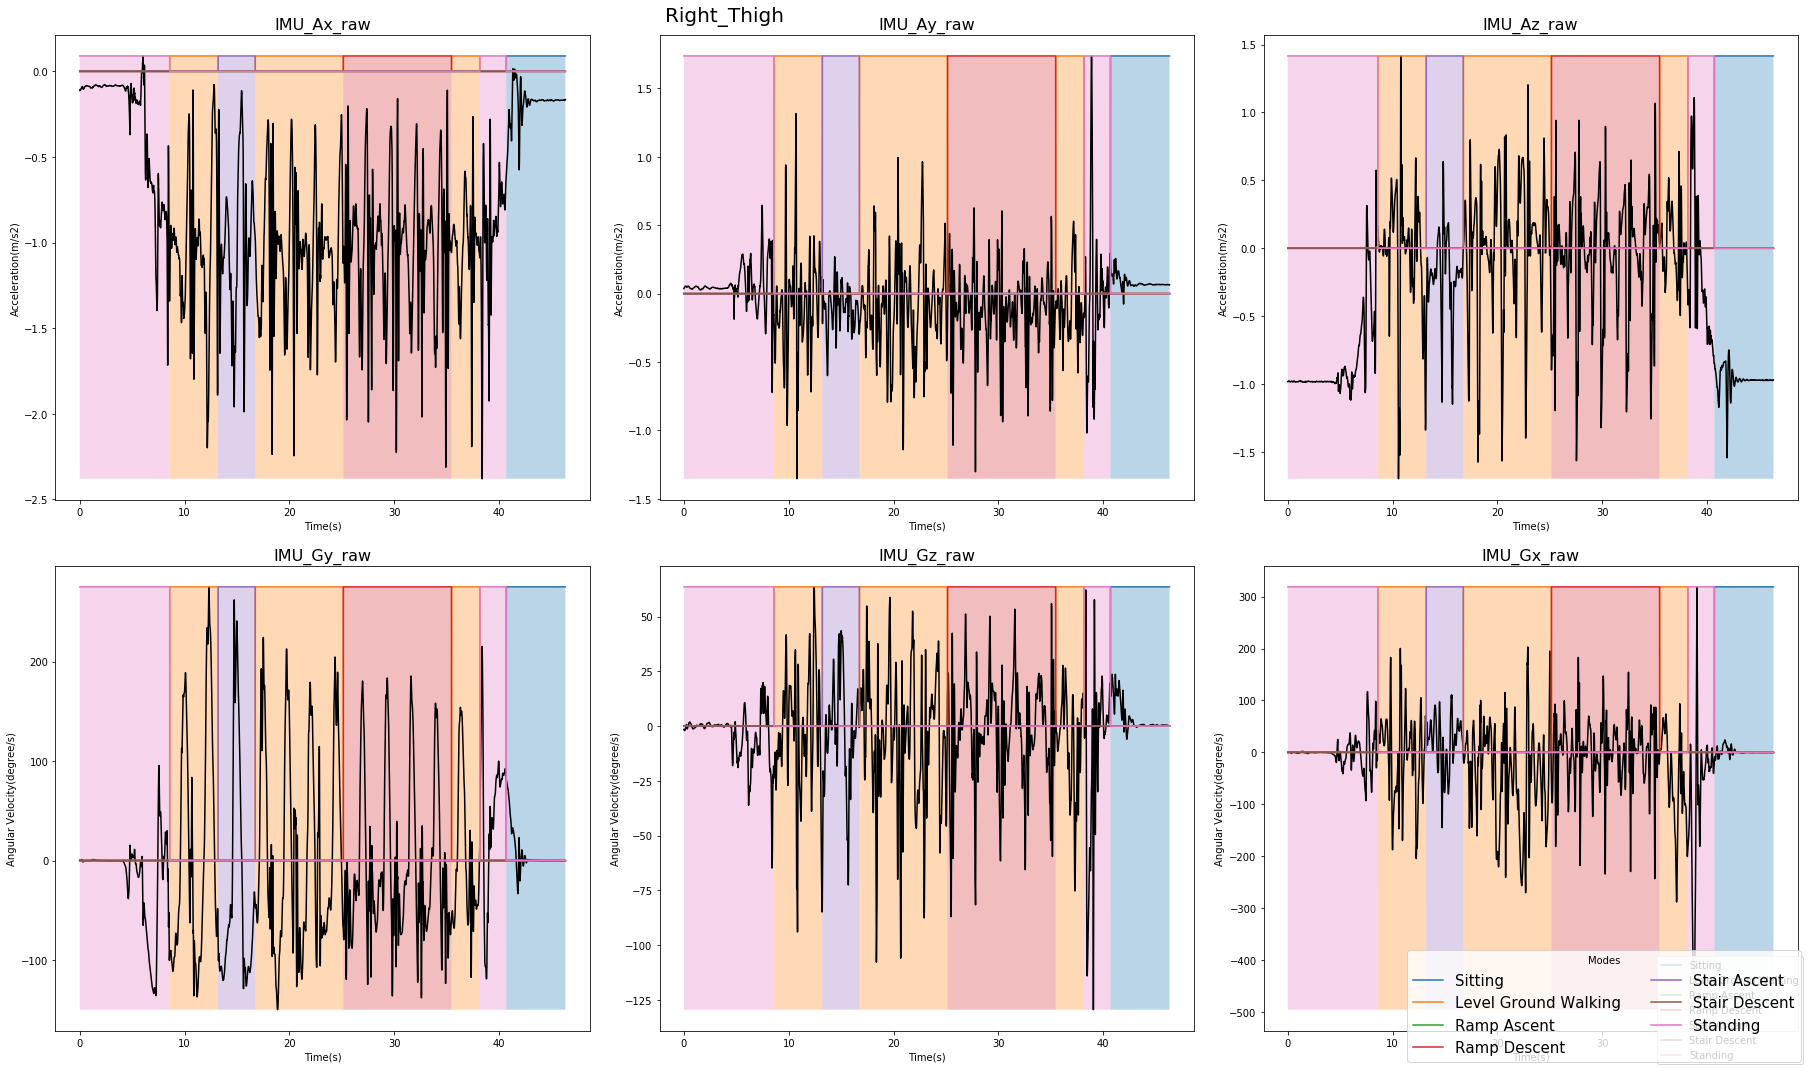

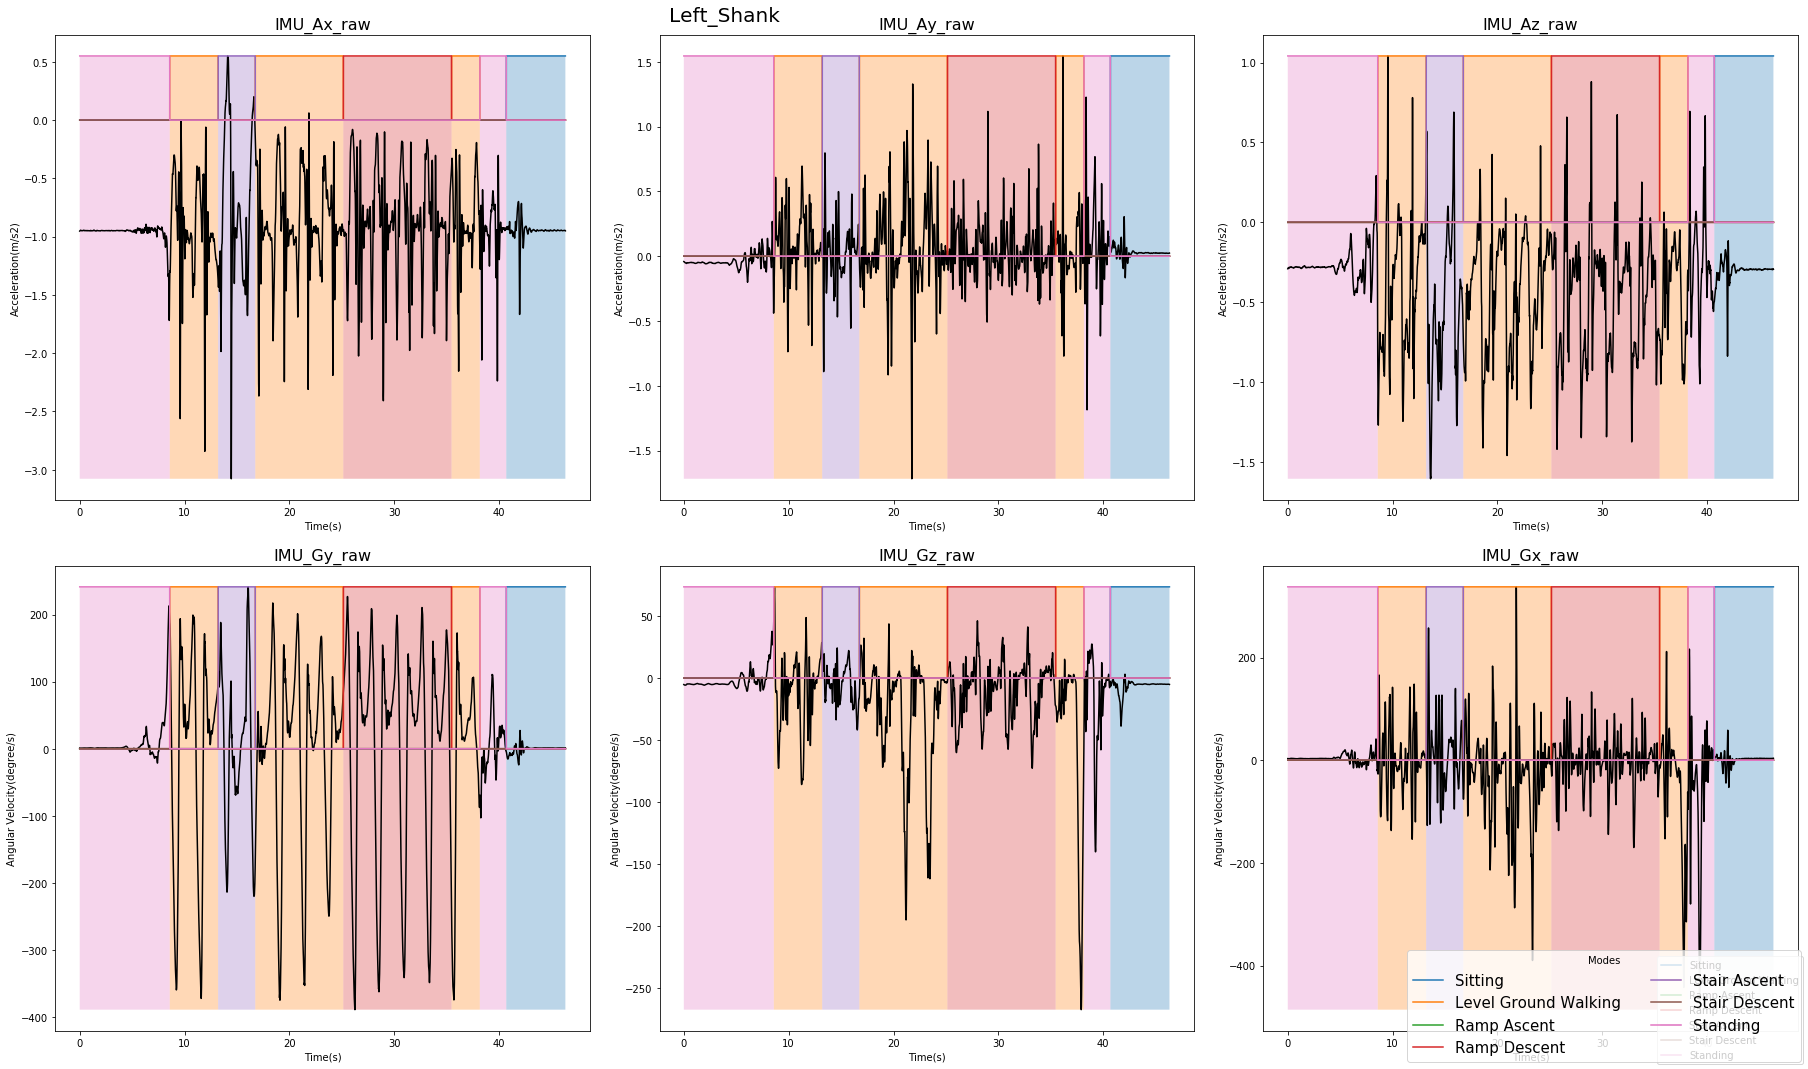

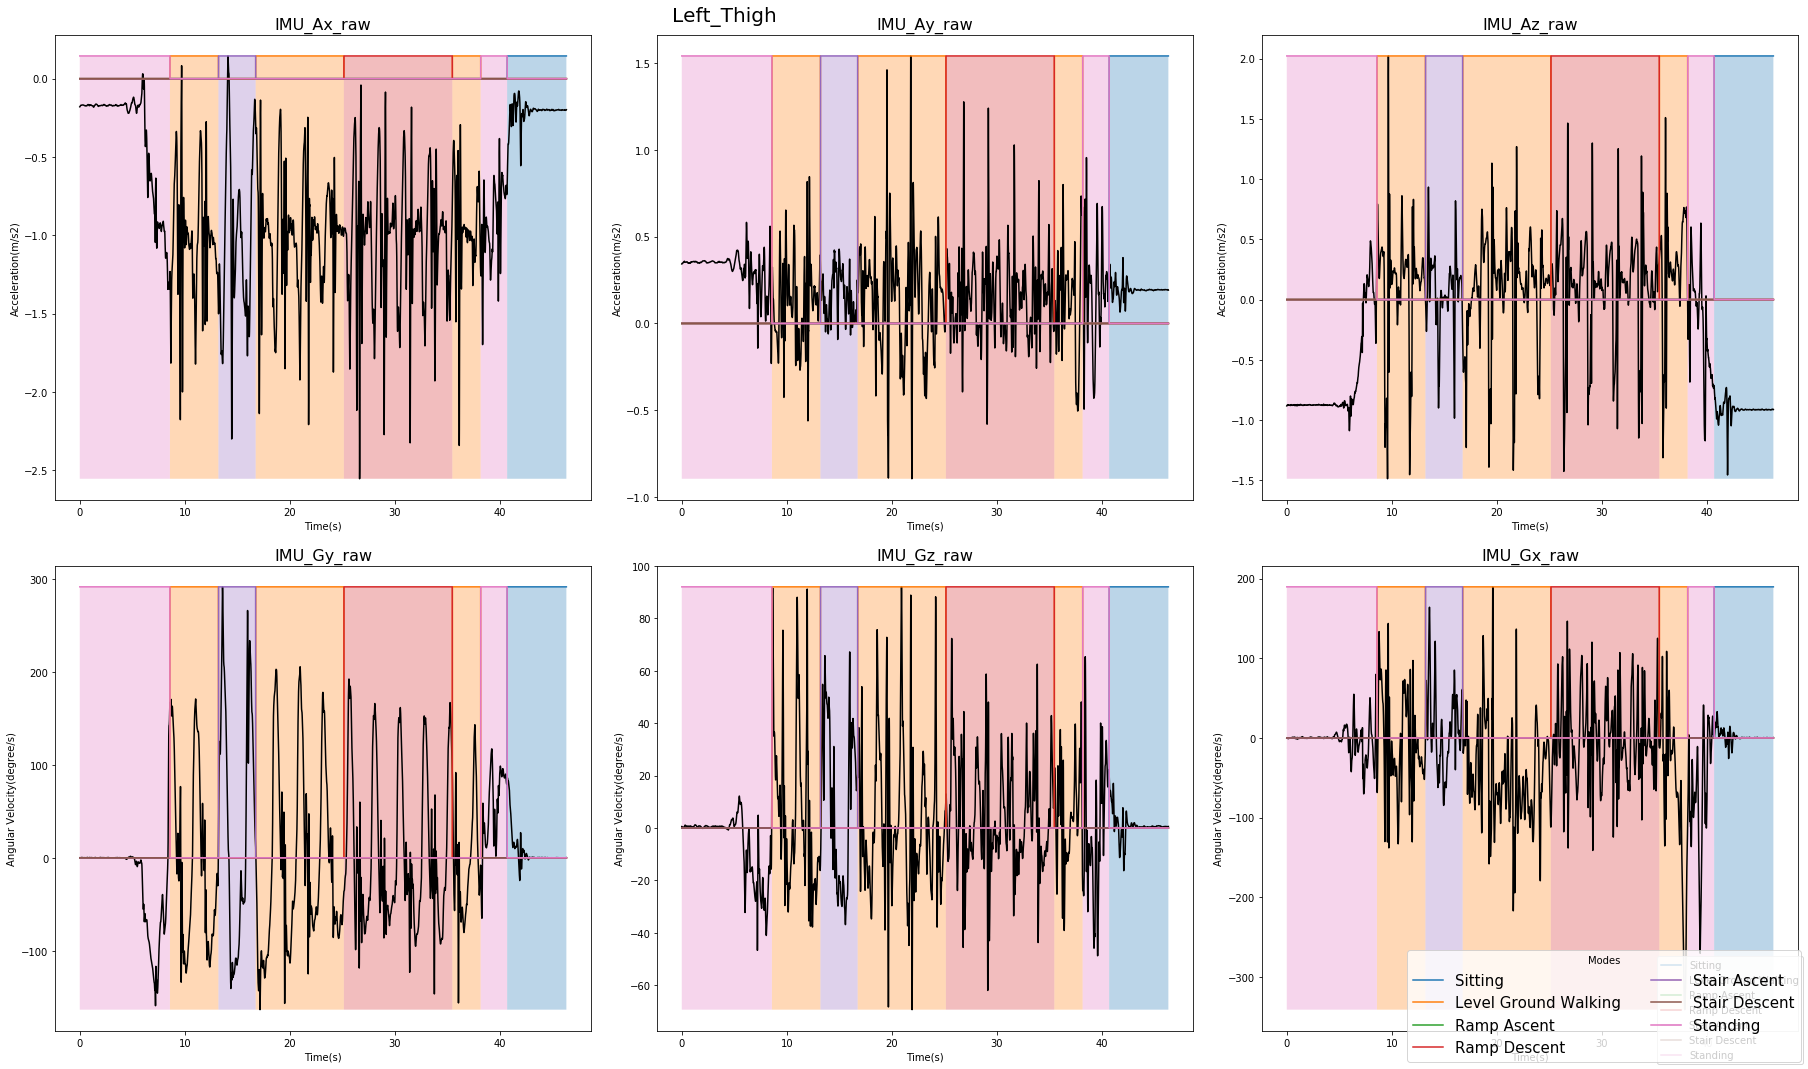

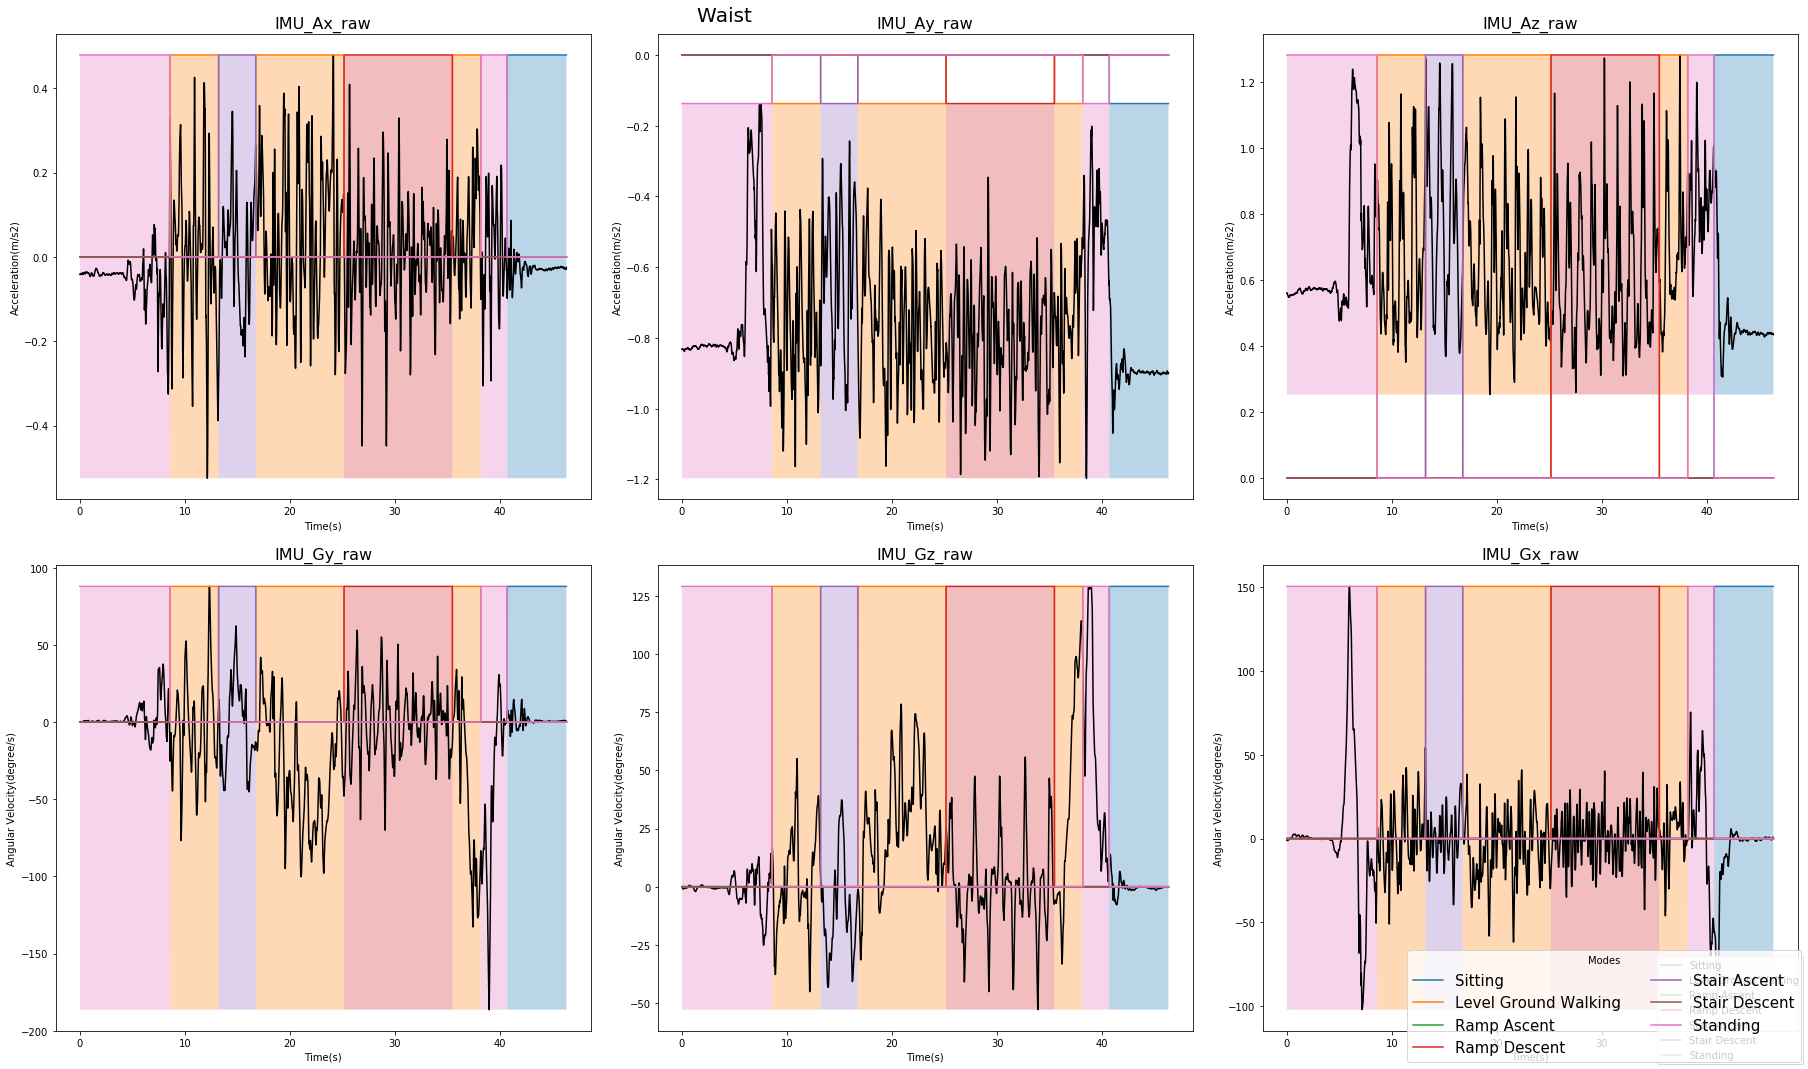

In [6]:
PlotIMUs('Right_Shank',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)
PlotIMUs('Right_Thigh',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)
PlotIMUs('Left_Shank',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)
PlotIMUs('Left_Thigh',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)
PlotIMUs('Waist',Array_data=array_data1,Channel_catagories=categories1,Label_prep=label_prep1)

## Decoding time-series data(IMU & Goniometer data) into image

### modified from https://stackoverflow.com/questions/33650371/recurrence-plot-in-python

In [30]:
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

### Standing phase

0.0

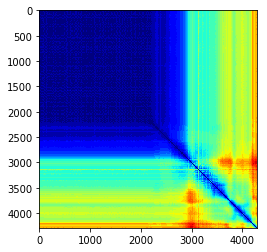

In [38]:
standing = recurrence_plot(array_data1_X_maxabs[0:4289],steps=100)
plt.imshow(standing,cmap='jet')
standing.max()
standing.min()

## Level ground walking phase

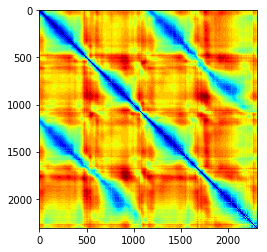

In [46]:
standing = recurrence_plot(array_data1_X_maxabs[4290:6599],steps=100)
plt.imshow(standing,cmap='jet')

### Stair ascent

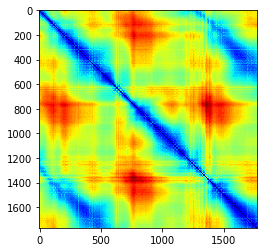

In [47]:
standing = recurrence_plot(array_data1_X_maxabs[6600:8369],steps=100)
plt.imshow(standing,cmap='jet')

### Level ground walking phase

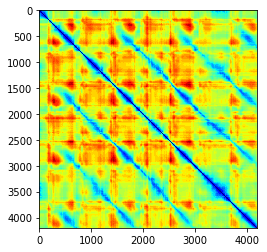

In [48]:
standing = recurrence_plot(array_data1_X_maxabs[8370:12569],steps=100)
plt.imshow(standing,cmap='jet')

### Ramp descent phase

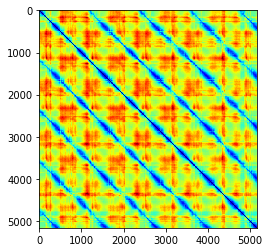

In [50]:
standing = recurrence_plot(array_data1_X_maxabs[12570:17729],steps=100)
plt.imshow(standing,cmap='jet')

### Level ground walking phase

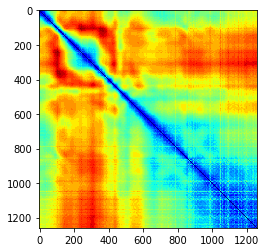

In [51]:
standing = recurrence_plot(array_data1_X_maxabs[19080:20339],steps=100)
plt.imshow(standing,cmap='jet')

### Sitting phase

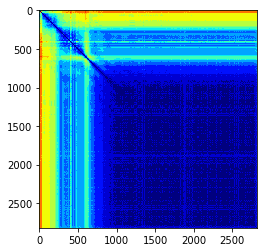

In [52]:
standing = recurrence_plot(array_data1_X_maxabs[20340:],steps=100)
plt.imshow(standing,cmap='jet')

#### As shown the decoded images of each modes in one trial, we can tell that different modes could be decoded into a easily distinguishable image. Then, deep CNNs is capable of discovering deep features in the images and classify them. So far, there is only one decede that has been implemented, but it looks effective. Therefore, next step will need to do

#### 1. figure out more decode methods
#### 2. decode all trails of data and input to CNNs
#### 3. implement RNNs as time-series data being input.